In [331]:
import pickle as pk
from tsne_torch import TorchTSNE as TSNE
import os
import time
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data, DataLoader, Dataset
from torch_geometric.loader import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.utils as pyg_utils
from torch_geometric.nn import GCNConv, global_mean_pool, GATConv
from torch.utils.tensorboard import SummaryWriter
from torch_geometric.utils import from_networkx
from sklearn.model_selection import train_test_split
from collections import defaultdict
from tqdm import tqdm
import seaborn as sns
import random

In [332]:
#generated feature set for simulations using the trained model
with open("/Users/sushmadhamodharan/Downloads/model data/1000_simulation_data_40features50epoch.pickle", 'rb') as file:
    c_data_tuple = pk.load(file)

In [333]:
tsne_x = []
tsne_y = []
for i in c_data_tuple.keys():
    k = list(c_data_tuple[i])
    tsne_x.append(k[2])
    tsne_y.append(k[0])

In [ ]:
selected_classes = random.sample(range(1, 100), 5)
x_fil = []
y_fil = []
for i in range(len(tsne_y)):
    if  tsne_y[i] in selected_classes:
        x_fil.append(tsne_x[i])
        y_fil.append(tsne_y[i])

In [341]:
X = torch.cat(x_fil, dim=0)
X_emb = TSNE(n_components=2, perplexity=6, n_iter=300, verbose=True).fit_transform(X)

using cpu
initializing...
skipping PCA because initial_dims is larger than input dimensionality
computing p-values...


  0%|          | 0/50 [00:00<?, ?it/s]

fitting...


  0%|          | 0/300 [00:00<?, ?it/s]

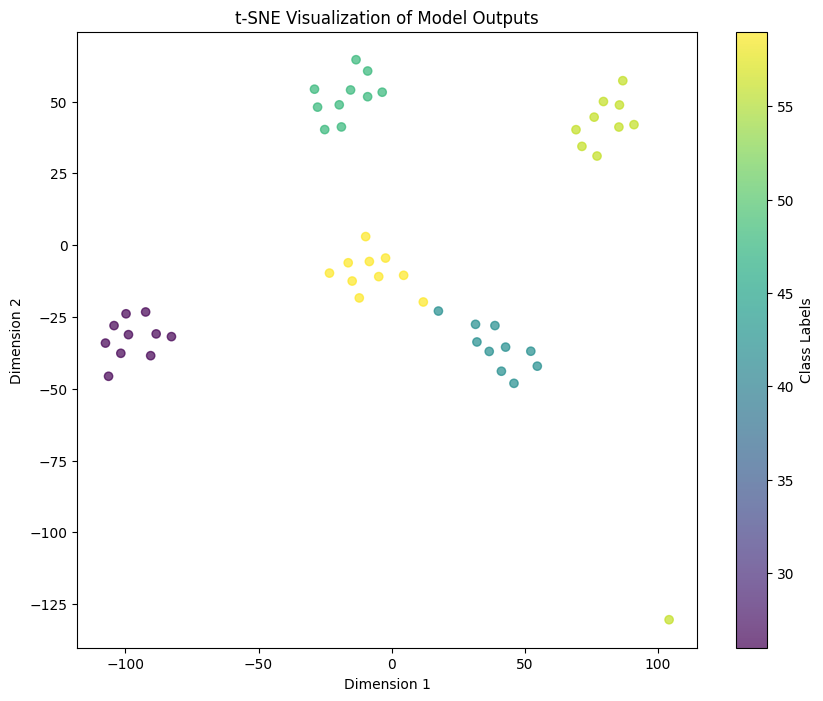

In [342]:
# Visualize
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_emb[:, 0], X_emb[:, 1], c=y_fil, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Class Labels")
plt.title("t-SNE Visualization of Model Outputs")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
